# CHAPTER 37: Latent Dirichlet Allocation

### This code generates figures 7, 8, 9, 10 and 11 from Chapter 37: Latent Dirichlet Allocation (vol II)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Eduardo Faria Cabrera

required libraries:
    
1. numpy
2. matplotlib
3. scipy

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from functions import *
from scipy.special import digamma

## Example 37.1 (Sentence analysis)

 We illustrate the application of the LDA 
algorithm (37.106) to the analysis of topics covered by sentences. To do so, we first generate a database consisting of $D=1000$ sentences with keywords chosen from a list of $T=4$ topics, listed in Table 37.1.

<br>
<table style="width: 70%;">
  <caption><b>Table 37.1 List of keywords under each of four topic categories.</b></caption>
    <tr>
    <th></th>
    <th>Weather</th>
    <th>Universe</th>
    <th>Sports</th>
    <th>Education</th>
  </tr>
  <tr>
    <th>1</th>
    <th>cloudy</th>
    <th>atmosphere</th>
    <th>ball</th>
    <th>ball</th>
  </tr>
  <tr>
    <th>2</th>
    <th>cold</th>
    <th>black hole</th>
    <th>basketball</th>
    <th>blackboard</th>
  </tr>
  <tr>
    <th>3</th>
    <th>hot</th>
    <th>comet</th>
    <th>bus</th>
    <th>book</th>
  </tr>
  <tr>
    <th>4</th>
    <th>humid</th>
    <th>dark matter</th>
    <th>coach</th>
    <th>bus</th>
  </tr>
  <tr>
    <th>5</th>
    <th>moon</th>
    <th>earth</th>
    <th>competition</th>
    <th>class</th>
  </tr>   
  <tr>
    <th>6</th>
    <th>rain</th>
    <th>galaxy</th>
    <th>loss</th>
    <th>college</th>
  </tr>  
  <tr>
    <th>7</th>
    <th>snow</th>
    <th>geometry</th>
    <th>match</th>
    <th>course</th>
  </tr>
  <tr>
    <th>8</th>
    <th>spring</th>
    <th>gravity</th>
    <th>player</th>
    <th>desk</th>
  </tr>
  <tr>
    <th>9</th>
    <th>strom</th>
    <th>moon</th>
    <th>running</th>
    <th>exam</th>
  </tr>
  <tr>
    <th>10</th>
    <th>summer</th>
    <th>orbit</th>
    <th>score</th>
    <th>geometry</th>
  </tr>
  <tr>
    <th>11</th>
    <th>sunny</th>
    <th>physics</th>
    <th>soccer</th>
    <th>lab</th>
  </tr>
  <tr>
    <th>12</th>
    <th>temperature</th>
    <th>planet</th>
    <th>sport</th>
    <th>learning</th>
  </tr>
  <tr>
    <th>13</th>
    <th>tornado</th>
    <th>star</th>
    <th>stadium</th>
    <th>lecture</th>
  </tr>
  <tr>
    <th>14</th>
    <th>weather</th>
    <th>sun</th>
    <th>tournament</th>
    <th>lunch</th>
  </tr>
  <tr>
    <th>15</th>
    <th>wind</th>
    <th>universe</th>
    <th>training</th>
    <th>physics</th>
  </tr>
  <tr>
    <th>16</th>
    <th>winter</th>
    <th></th>
    <th>win</th>
    <th>principal</th>
  </tr>
  <tr>
    <th>17</th>
    <th></th>
    <th></th>
    <th></th>
    <th>school</th>
  </tr>
  <tr>
    <th>18</th>
    <th></th>
    <th></th>
    <th></th>
    <th>student</th>
  </tr>
  <tr>
    <th>19</th>
    <th></th>
    <th></th>
    <th></th>
    <th>teacher</th>
  </tr>
  <tr>
    <th>20</th>
    <th></th>
    <th></th>
    <th></th>
    <th>test</th>
  </tr>
</table>
<br>

($\textbf{Data generation}$). We collect the keywords into a dictionary with $W=62$ entries (repeated words, such as "ball" appearing under "sports" and "education", are listed only once in the dictionary):

$
\textnormal{dictionary}=
\Bigl\{\textnormal{atmosphere, ball,      basketball, black hole,    blackboard,      book,      bus,      class,}\\
\quad\textnormal{cloudy,   coach, cold,      college,      comet ,     competition,      course,  dark matter,  }\\
\quad\textnormal{desk,      earth,      exam,      galaxy,
 geometry,      gravity,  hot,      humid,      lab, learning,     } \\
\quad \textnormal{lecture,      loss,      lunch, match,      moon, orbit,      physics,      planet,      player,   } \\
\quad  \textnormal{principal,      rain, running,      school,      score,      snow,
  soccer,      sport,      spring,  }\\
\quad \textnormal{stadium,  star,      storm,      student,      summer,      sun,      sunny,      teacher, } \\
\quad \textnormal{temperature,   test,      tornado,      tournament,      training,      universe,      weather, }\\
\quad \textnormal{win,      wind,      winter} \Bigr\}\\
$

In [34]:
#Generating the data
D = 1000 # number of documents to generate for the database; they will be sentences in this example
M = 300 # number of iterations to repeat the recursions
L = 1 # number of epochs to perform by repeating training over data

# 4 topics
T = 4
weather = np.array(['rain','weather','cold','hot','sunny','snow','cloudy','humid','temperature','storm','tornado','wind','moon','spring','winter','summer'])
universe= np.array(['universe','planet','star','sun','moon','earth','comet','black hole','galaxy','orbit','gravity','physics','geometry','atmosphere','dark matter'])
sports  = np.array(['sport','player','ball','stadium','score','coach','training','soccer','basketball','running','bus','win','loss','tournament','match','competition'])
education = np.array(['student','learning','teacher','book','lecture','school','college','ball','blackboard','desk','lunch','course','principal','lab','exam','test','geometry','physics','class','bus'])

weather = np.sort(weather) # sorting alphabetically
universe = np.sort(universe)
sports = np.sort(sports)
education = np.sort(education)

# Dictionary of keywords and respective BETA vectors under each topic
dictionary = np.array(['rain','weather','cold','hot','sunny','snow','cloudy','humid','temperature','storm','tornado','wind', \
    'moon','spring','winter','summer','universe','planet','star','sun','earth','comet','black hole','galaxy','orbit','gravity', \
    'physics','geometry','atmosphere','dark matter','sport','player','ball','stadium','score','coach','training','soccer', \
    'basketball','running','bus','test','win','loss','tournament','match','competition','student', \
    'learning','teacher','book','lecture','school','college','blackboard','desk','lab', 'lunch','course','principal', \
    'exam','class'])

dictionary = np.sort(dictionary)
W = max(dictionary.shape)

beta_weather = np.zeros(W)
beta_universe = np.zeros(W)
beta_sports = np.zeros(W)
beta_education = np.zeros(W)

N_weather = max(weather.shape)
N_universe = max(universe.shape)
N_sports = max(sports.shape)
N_education = max(education.shape)

for w in range(W): # setting the beta's uniformly across each topic
    word = dictionary[w]
    for wprime in range(N_weather):
        wx = weather[wprime]
        if word == wx:
            beta_weather[w] = 1/N_weather # we are assuming the words in category weather are equally probable 
    for wprime in range(N_sports):
        wx = sports[wprime]
        if word == wx:
            beta_sports[w] = 1/N_sports # we are assuming the words in category sports are equally probable 
    for wprime in range(N_education):
        wx = education[wprime]
        if word == wx:
            beta_education[w] = 1/N_education # we are assuming the words in category education are equally probable 
    for wprime in range(N_universe):
        wx = universe[wprime]
        if word == wx:
            beta_universe[w] = 1/N_universe # we are assuming the words in category universe are equally probable 

y = np.concatenate([np.array([beta_weather[w], beta_universe[w], beta_sports[w], beta_education[w]]).reshape(1, -1) / np.array([beta_weather[w], beta_universe[w], beta_sports[w], beta_education[w]]).sum() for w in range(W)], axis=0)

# generation of database
Nd_vec = np.zeros(D) # size of each document
database = D*[None] # database of documents

Nd_max = 8 # maximum number of keywords in a document
Nd_min = 3 # minimum number of keywords in a document
alpha_org = np.random.rand(T) + 0.0001 # alpha used to generate the theta's in the database

count_of_words = np.zeros(W) # counter: counts number of times a word is repeated
total_words = 0 # total number of words in database
count_of_words_in_topics = np.zeros(T) # counts number of words in each topic in database

Theta_org = np.zeros((T, D))
ZN = D*[None] # saves the topics for the words in each document

for d in range(D):
    words_d = []
    theta_d = dirichlet(alpha_org)
    Theta_org[:, d] = theta_d # saves theta_d
    Nd = np.random.randint(1, Nd_max-2) + Nd_min
    zn_vec = np.zeros(Nd)
    for n in range(Nd): # generate words in document
        zn = categorical_variable(theta_d)
        if zn == 1:
            beta_org = beta_weather
            count_of_words_in_topics[0] += 1
        elif zn == 2:
            beta_org = beta_universe
            count_of_words_in_topics[1] += 1
        elif zn == 3:
            beta_org = beta_sports
            count_of_words_in_topics[2] += 1
        elif zn == 4:
            beta_org = beta_education
            count_of_words_in_topics[3] +=1
        zn_vec[n] = zn
        index_of_word = categorical_variable(beta_org)
        words_d.append(dictionary[index_of_word-1])
        count_of_words[index_of_word-1] += 1
        total_words += 1
    database[d] = words_d
    Nd_vec[d] = Nd
    ZN[d] = zn_vec

print("Total words in all D documents in database: ", total_words)
count_of_words_norm = count_of_words/total_words # percentage measure

count_of_words_in_topics_relative = count_of_words_in_topics/total_words

topics = ["weather", "universe", "sports", "education"]
Beta = np.concatenate([beta_weather.reshape(1, -1), beta_universe.reshape(1, -1), beta_sports.reshape(1, -1), beta_education.reshape(1, -1)])


Total words in all D documents in database:  5962


[]

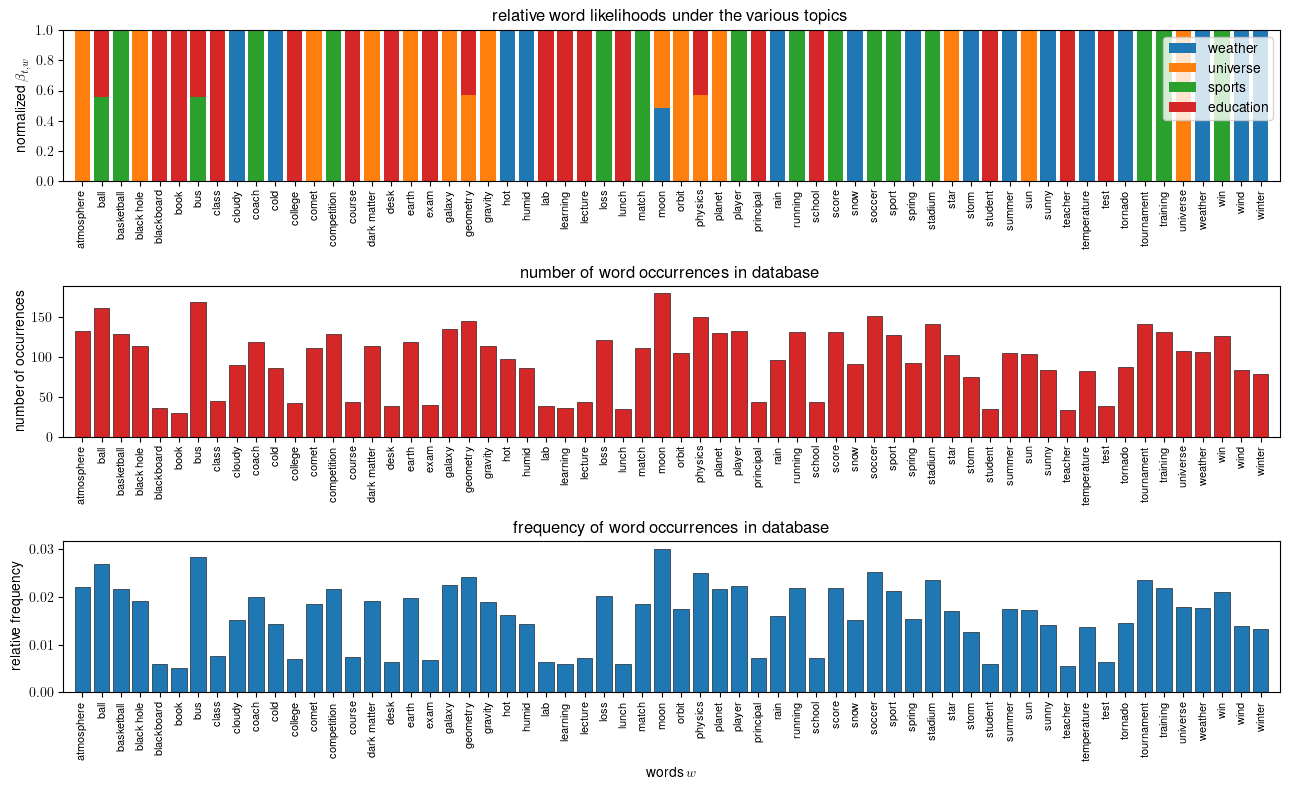

In [30]:
# figure 7

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=13, 8
fig = plt.figure()

ax = fig.add_subplot(311)
x = np.arange(W)
y1 = y[:, 0]
y2 = y[:, 1]
y3 = y[:, 2]
y4 = y[:, 3]

ax.bar(x, y1, label="weather")
ax.bar(x, y2, bottom=y1, label="universe")
ax.bar(x, y3, bottom=y1+y2, label="sports")
ax.bar(x, y4, bottom=y1+y2+y3, label="education")
plt.legend(loc='upper right')
ax.set_xlim(-1, W)
ax.set_xticks(x)
ax.set_title("relative word likelihoods under the various topics")
ax.set_ylabel("normalized $\\beta_{t, w}$")
ax.set_xticklabels(dictionary.tolist(), rotation='vertical', fontsize=8)

ax = fig.add_subplot(312)

ax.bar(x, count_of_words, color="tab:red", edgecolor="black", linewidth=0.4)
ax.set_xlim(-1, W)
ax.set_xticks(x)
ax.set_xticklabels(dictionary.tolist(), rotation='vertical', fontsize=8)
ax.set_title("number of word occurrences in database")
ax.set_ylabel("number of occurrences")

ax = fig.add_subplot(313)

ax.bar(x, count_of_words_norm, edgecolor="black", linewidth=0.4)
ax.set_xlim(-1, W)
ax.set_xticks(x)
ax.set_xticklabels(dictionary.tolist(), rotation='vertical', fontsize=8)
ax.set_title("frequency of word occurrences in database")
ax.set_ylabel("relative frequency")
ax.set_xlabel("words $w$")

fig.tight_layout()

#plt.savefig("figs/fig-7.pdf", format="pdf", bbox_inches="tight")

plt.plot()

**Figure 37.7**  The top plot shows the normalized likelihood values for the words in the dictionary across the four topics.  The middle plot shows the number of times that each word appears in the entire database, while the bottom plot shows the same information normalized by the total number of words in the database (5960 in total). 

We associate with each topic $t\in\{\textnormal{weather, universe, sports, education}\}$ a likelihood vector $\beta_t$ of size $W\times 1$; its $w$th entry $\beta_{t,w}$ indicates the likelihood that keyword $w$ appears under topic $t$. For simplicity, in this example, we assign uniform probabilities for the words appearing under each topic; although one can easily adjust the simulation to make some words more likely than other words:

$
\beta_{{\tiny\textnormal{weather}},w}=\left\{
\begin{array}{ll}1/16,&\textnormal{if word } w \textnormal{appears under topic "weather"}\\
0,& \textnormal{otherwise}
\end{array}
\right.
$

For example, if $w=\textnormal{"storm", then } \beta_{\textnormal{weather, storm}}=1/16$. Similarly, we set

$
\beta_{{\tiny\textnormal{universe}},w}=\left\{
\begin{array}{ll}1/15,&\textnormal{if word } w \textnormal{appears under topic "universe"}\\
0,& \textnormal{otherwise}
\end{array}
\right.
$

$
\beta_{{\tiny\textnormal{sports}},w}=\left\{
\begin{array}{ll}1/16,&\textnormal{if word } w \textnormal{appears under topic "sports"}\\
0,& \textnormal{otherwise}
\end{array}
\right.
$

$
\beta_{{\tiny\textnormal{education}},w}=\left\{
\begin{array}{ll}1/20,&\textnormal{if word } w \textnormal{appears under topic "education"}\\
0,& \textnormal{otherwise}
\end{array}
\right.
$

The top row in Fig 37.7 shows these likelihood values in normalized form using a bar plot. For each word $w$, if it appears only under a single topic, then its normalized $\beta_{t,w}$ value will be equal to 1. For example, the word "atmosphere" appears only under the topic "universe"; its bar is shown in light blue and has height equal to 1. If a word $w$ appears under different topics, say, under two topics, then it will have two $\beta-$values: $\beta_{t_1,w}$ under topic $1$ and $\beta_{t_2,w}$ under topic 2. We scale these values by their sum so that the normalized values add up to 1, and they reflect how much more likely the word is to appear under one topic than the other. For example, the word "physics" appears under the topics "education" (shown in dark brown) and "universe" shown in light blue. The bar for the word "physics" has two colors and the heights of the two colored segments represent the size of the normalized $\beta-$values for "physics": 0.5714  under "universe" and 0.4286  under "education".

Next, we generate the $D=1000$ sentences for the database. Each sentence in the database is represented by a collection of keywords; in our simulation, we assume the number of keywords per sentence can vary between 3 and 8. We generate the sentences as follows. We first generate a random $4\times 1$ parameter vector $\alpha=\textnormal{col}\{\alpha_t\}$ with positive entries to drive the Dirichlet distribution for $\theta_d$, namely, 

$
\alpha\;=\;\textnormal{col}\Bigl\{
0.4495,\,
0.5692,\,
0.6121,\,
0.5406
\Bigr\}
$

For each sentence (or document) $d$, we generate a $4\times 1$ Dirichlet-distributed vector  $\theta_d=\textnormal{Dirichlet}(\alpha)$. The entries $\{\theta_{d,t}\}$ of this  vector indicate the likelihood for topic $t$ appearing in document $d$. We use the generative model described under Definition 37.1 to generate the database. For each sentence $d$:


(a) We generate $\theta_d$ from a Dirichlet distribution with parameter vector $\alpha$.

(b) We select the size $N_d$ of the sentence randomly between $3$ and $8$ keywords.

(c) For each keyword $n=1,2,\ldots,N_d$:

(c.1) We generate a categorical variable $z_{d,n}$ according to $\theta_d$. The variable $z_{d,n}$ assumes one of four topic values, chosen according to the probabilities defined by $\theta_d$.

(c.2) We select the word $w_{d,n}$ randomly using a categorical distribution with parameter $\beta_{z_{d,n}}$; that is, we use the $\beta-$vector that corresponds to the topic chosen for this word. 

Table 37.2 lists some random selections of the sentences generated for the database; each row shows the keywords associated with the corresponding sentence and the entries of $\theta_d$ used to generate them. For example, for the first sentence corresponding to $d=1$, the largest entry of $\theta_d$ is 0.7312, which means that sampling words from the topic "weather" is more likely than from the other topics. The second highest entry is $0.1589$, which explains the occurrence of some keywords from the topic "sports". The same reasoning applies to the other sentences in the database.

<br>
<table style="width: 70%;">
    <tr>
    <th>d</th>
    <th>Sentence in database</th>
    <th>theta (4 x 1)</th>
  </tr>
  <tr>
    <th>1</th>
    <th>{winter, hot, snow, tournament, sport, rain}</th>
    <th>{0.7312, 0.0000, 0.1589, 0.1099}</th>
  </tr>
  <tr>
    <th>21</th>
    <th>{physics, wind, bus, sptring}</th>
    <th>{0.4600, 0.1819, 0.2295, 0.1285}</th>
  </tr>
  <tr>
    <th>153</th>
    <th>{player, start, comet, win}</th>
    <th>{0.1132, 0.2241, 0.6114, 0.0513}</th>
  </tr>
  <tr>
    <th>812</th>
    <th>{lunch, player, black hole, moon, sun, score, sun, class}</th>
    <th>{0.0005, 0.7112, 0.0982, 0.1901}</th>
  </tr>
  <tr>
    <th>943</th>
    <th>{geometry, running, geometry, loss, competition}</th>
    <th>{0.0159, 0.0819, 0.7957, 0.1065}</th>
  </tr>   
</table>
<br>

In the process of generating the sentences for the database, we count the number of times each word from the dictionary appears in the database, which is shown in the bottom plots in Fig. 37.7. The middle plot shows the number of times that each word appears in the entire database. For example, it is seen that the word "moon" is the most frequent word for this simulation.  The bottom plot shows the same information, albeit in terms of the relative frequency for each word, which is obtained by dividing by the total number of words generated during the creation of the database (5960). We also count how many words are generated under each topic, both in absolute and relative terms. These statistics are shown in Fig. 37.8.

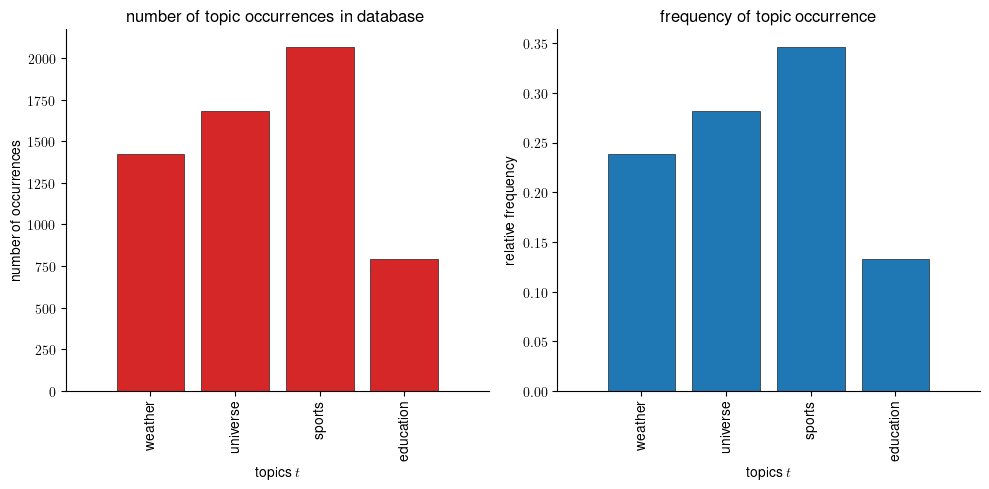

In [27]:
# figure 8

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 5
fig = plt.figure()

ax = fig.add_subplot(121)

ax.bar(np.arange(T), count_of_words_in_topics, color="tab:red", edgecolor="black", linewidth=0.4)
ax.set_xlim(-1, T)
ax.set_xticks(np.arange(T))
ax.set_xticklabels(["weather", "universe", "sports", "education"], rotation='vertical', fontsize=10)
ax.set_title("number of topic occurrences in database")
ax.set_ylabel("number of occurrences")
ax.set_xlabel("topics $t$")
ax.spines[['right', 'top']].set_visible(False)


ax = fig.add_subplot(122)

ax.bar(np.arange(T), count_of_words_in_topics_relative, edgecolor="black", linewidth=0.4)
ax.set_xlim(-1, T)
ax.set_xticks(np.arange(T))
ax.set_xticklabels(["weather", "universe", "sports", "education"], rotation='vertical', fontsize=10)
ax.set_title("frequency of topic occurrence")
ax.set_ylabel("relative frequency")
ax.set_xlabel("topics $t$")
ax.spines[['right', 'top']].set_visible(False)


fig.tight_layout()

#plt.savefig("figs/fig-8.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 37.8** ($\textit{Left}$) The number of times words from each topic have been selected and added to the database. ($\textit{Right}$) The same information normalized by the total number of words generated for the database. 

$\textbf{Unsupervised training}$ Once the database of $D=1000$ sentences (or documents) is generated, we apply the LDA algorithm (37.106) to it and run $M=300$ iterations using  the step-size value $\mu=0.00001$. The inputs to the algorithm are the keywords for the sentences appearing in the database and the dictionary of $W=62$ words. The algorithm does not know that these keywords arise from four topics. It will however end up learning how to assign the words in the dictionary to four separate topics. The algorithm does not know the $T\times 1$ parameter vector  $\alpha=\textnormal{col}\{\alpha_t\}$ that was used to generate the various $\{\theta_d\}$ for the sentences in the database; it will estimate it starting from a random initial condition. The algorithm  does not know either the  $W\times 1$ parameter vector $\eta=\textnormal{col}\{\eta_{w}\}$ that explains the choice of the $\beta-$ vectors. It will estimate it starting from a random initial value.

In [ ]:
# Initialization
epsilon = 0.000001
Theta  = np.zeros((T, D)) # contains vectors theta_d
Beta = np.zeros((W, T)) # contains vectors beta_t
alpha_original = np.random.rand(T) + epsilon # initial condition for the original parameters vector alpha
eta_original = np.random.rand(W) + epsilon # initial condition for the original parameter vector eta

thetaCell = [] # initialization of theta
for d in range(D):
    thetaCell.append((1/T)*np.ones((T, 1))@np.ones((1, int(Nd_vec[d])))) # T x Nd matrix for document d

beta_bar = (1/T)*np.ones((W, 1))@np.ones((1, T)) # W x T matrix
alpha = np.zeros((T, D)) # initialization of alpha
for d in range(D):
    X = thetaCell[d]
    alpha[:, d] = alpha_original + X.sum(axis=-1)

eta = np.zeros((W, T)) # initialization of eta
for t in range(T):
    for w in range(W):
        word_w = dictionary[w]
        sum_arg = 0
        for d1 in range(D):
            Nd = Nd_vec[d1]
            document = database[d1]
            X = thetaCell[d1]
            for n in range(int(Nd)):
                word_d_n = document[n]
                if word_d_n == word_w:
                    sum_arg = sum_arg = X[t, n]
    eta[w, t] = eta_original[w] + sum_arg

DidxCell = [] # one vector of size Nd for each document; saves location of words from document in the dictionary
for d in range(D):
    DidxCell.append(np.zeros(int(Nd_vec[d])))

# UNSUPERVISED LEARNING TRAINING
for ell in range(L): #iterate over epochs
    URR = np.random.permutation(D) # random reshuffling
    for m in range(M):
        for t in range(T): # computing beta_bar
            for w in range(W):
                word_w = dictionary[w]
                num = 0 # numerator value
                for d2 in range(D):
                    d = URR[d2]
                    Nd = Nd_vec[d] # number of words in document d
                    document = database[d] # the documebt itself
                    X = thetaCell[d] # matrix of theta's of size T x Nd for each document
                    idx_vec = DidxCell[d] # vector of indexes for locations of words from document d
                    for n_prime in range(int(Nd)):
                        word_d_n_prime = document[n_prime]
                        if word_d_n_prime == word_w:
                            num = num + X[t, n_prime]
                            idx_vec[n_prime] = w # word w_{d, n_prime} is word of inde w in the large dictionary
                    DidxCell[d] = idx_vec
                if num != 0:
                    beta_bar[w, t] = num # updated t-th column of beta matrix
                else:
                    beta_bar[w, t] = 0
            beta_bar[:, t] = beta_bar[:, t] / sum(beta_bar[:, t])
        for d2 in range(D): #iterate over documents
            d = URR[d2]
            Nd = Nd_vec[d] # number of words in document d
            document = database[d] # the document itself
            X = thetaCell[d] # matrix of theta's of size T x Nd for each document
            idx_vec = DidxCell[d] # vector of indexes for locations of words from document d

            for t in range(T): # computing the theta's
                Y = beta_bar
                a = digamma(alpha[t, d])
                b = digamma(sum(alpha[:, d]))
                c = np.exp(a-b)
                idx_vec = DidxCell[d]
                for n in range(int(Nd)):
                    nidx = idx_vec[n]
                    X[t, n] = Y[int(nidx), t]*c # updated t-th row of theta matrix
            
            for n in range(int(Nd)): # renormalize theta columns
                X[:, n] = X[:, n] / sum(X[:, n])
            
            thetaCell[d] = X # update theta

            for t in range(T):
                alpha[t, d] = alpha_original[t] + sum(X[t, :])
            
        for t in range(T): # iterate over topics
            for w in range(W):
                word_w = dictionary[w]
                sum_arg = 0
                for d1 in range(D):
                    Nd = Nd_vec[d1]
                    document = database[int(d1)]
                    X = thetaCell[d1]
                    for n in range(int(Nd)):
                        word_d_n = document[n]
                        if word_d_n == word_w:
                            sum_arg = sum_arg + X[t, n]
                eta[w, t] = eta_original[w] + sum_arg
        
        # estimating the parameters alpha and eta
        step_size = 0.00001
        gradient_alpha = np.zeros(T)
        sum_aux = 0
        for d1 in range(D):
            sum_aux += digamma(sum(alpha[:, d1]))
        tau = D*digamma(sum(alpha_original)) - sum_aux

        for t1 in range(T):
            a = -D*digamma(alpha_original[t1])
            sum_aux = 0
            for d1 in range(D):
                sum_aux += digamma(alpha[t1, d1])
            gradient_alpha[t1] = sum_aux - a + tau
        gamma = D*trigamma(sum(alpha_original))

        pvec = np.zeros(T) # diagonal matrix P
        sum_inv = 0
        for t1 in range(T):
            pvec[t1] = D*trigamma(alpha_original[t1])
            sum_inv += (1/pvec[t1])
        c = sum(gradient_alpha/pvec)/((1/gamma)-sum_inv)
        alpha_original = alpha_original - step_size*((gradient_alpha + c)/pvec)

        gradient_eta = np.zeros(W)
        sum_aux = 0
        for t in range(T):
            sum_aux += digamma(sum(eta[:, t1]))
        tau2 = T*digamma(sum(eta_original)) - sum_aux

        for w1 in range(W):
            a = - T*digamma(eta_original[w1])
            sum_aux = 0
            for t in range(T):
                sum_aux += digamma(eta[w1, t1])
            gradient_eta[w1] = sum_aux - a + tau2

        rho = T*trigamma(sum(eta_original))

        rvec = np.zeros(W) # diagonal matrix R
        sum_inv = 0
        for w1 in range(W):
            rvec[w1] = T*trigamma(eta_original[w1])
            sum_inv = sum_inv + (1/rvec[w1])
        c2 = sum(gradient_eta/rvec)/((1/rho)-sum_inv)
        eta_original = eta_original - step_size*((gradient_eta+c2)/rvec)     

Theta_estimated = np.zeros((T, D)) # in order to confuse with the Theta we saved before
Beta_estimated = np.zeros((W, T)) # in order to confuse with the Beta we saved before
for t1 in range(T):
    for d1 in range(D):
        Theta_estimated[t1, d1] = alpha[t1, d1] / sum(alpha[:, d1])

for t1 in range(T):
    for w1 in range(W):
        Beta_estimated[w1, t1] = eta[w1, t1]/sum(eta[:, t1])

Beta_estimated_norm = np.copy(Beta_estimated)
for w in range(W):
    Beta_estimated_norm[w] = Beta_estimated[w] / sum(Beta_estimated[w])

[]

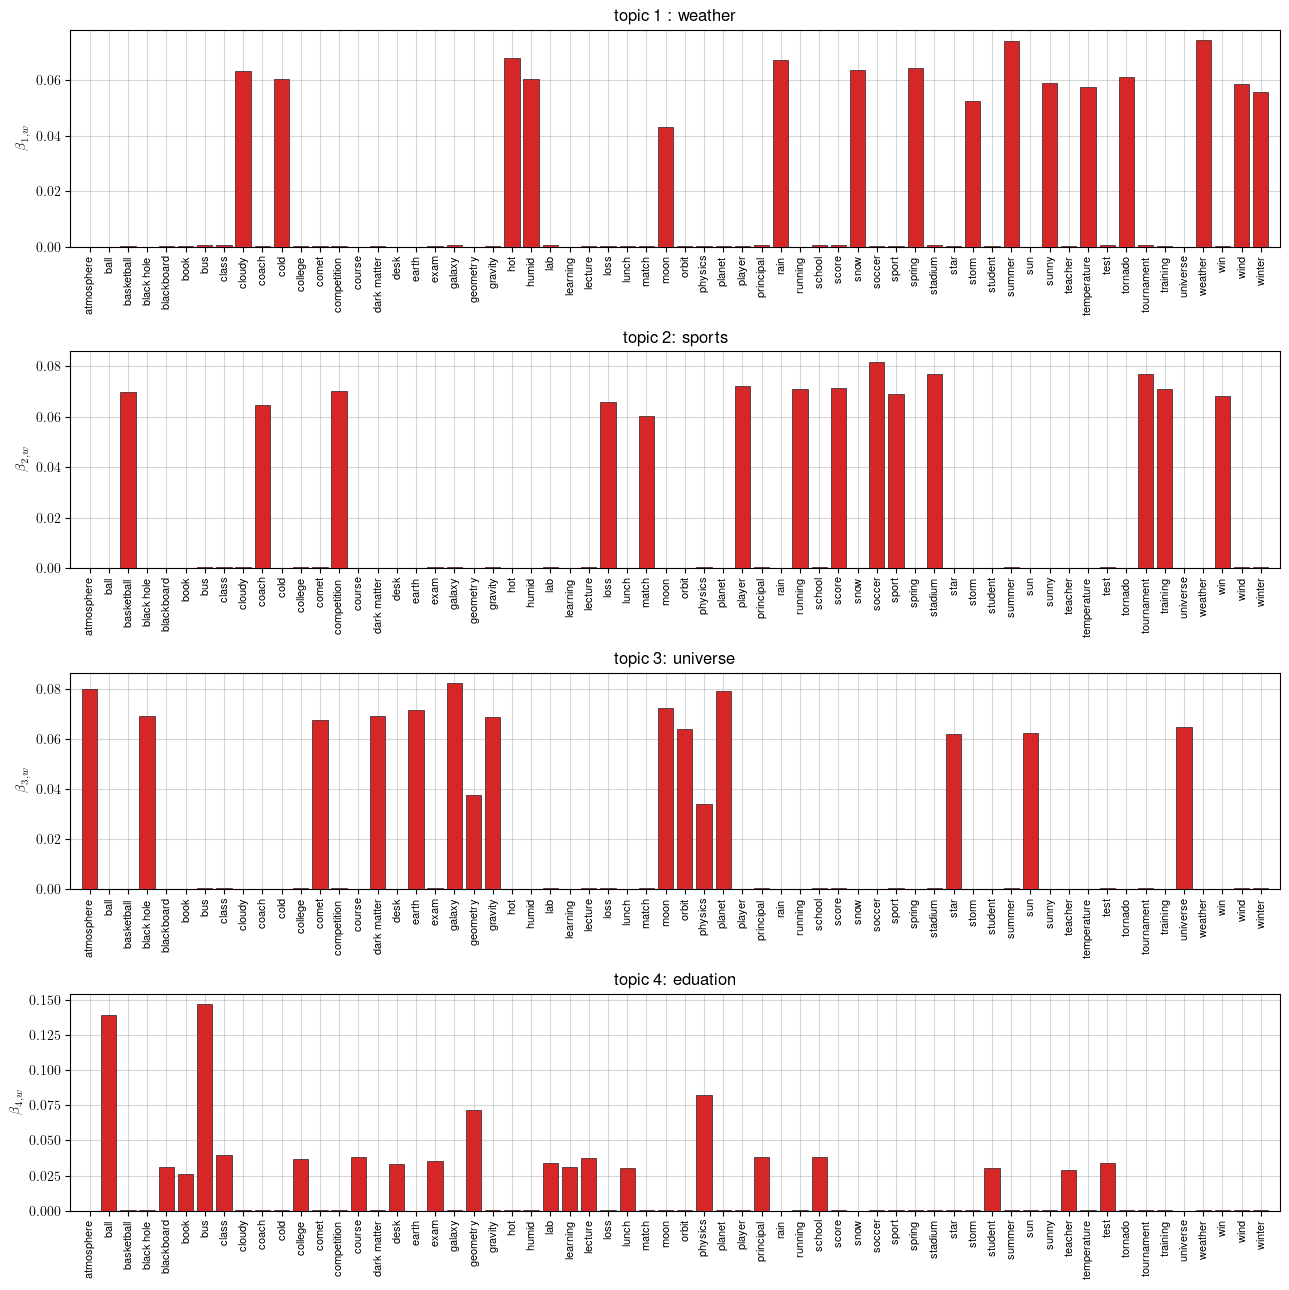

In [31]:
# figure 9 (combined with above)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=13, 13
fig = plt.figure()

ax = fig.add_subplot(411)
x = np.arange(W)

ax.bar(x, Beta_estimated[:, 1], label="weather", color="tab:red", edgecolor="black", linewidth=0.4, zorder=3)
ax.set_xlim(-1, W)
ax.set_xticks(x)
ax.set_title("topic 1 : weather")
ax.set_ylabel("$\\beta_{1, w}$")
ax.set_xticklabels(dictionary.tolist(), rotation='vertical', fontsize=8)
plt.grid(zorder=0, alpha=0.5)

ax = fig.add_subplot(412)
ax.bar(x, Beta_estimated[:, 2], label="weather", color="tab:red", edgecolor="black", linewidth=0.4, zorder=3)
ax.set_xlim(-1, W)
ax.set_xticks(x)
ax.set_title("topic 2: sports")
ax.set_ylabel("$\\beta_{2, w}$")
ax.set_xticklabels(dictionary.tolist(), rotation='vertical', fontsize=8)
plt.grid(zorder=0, alpha=0.5)

ax = fig.add_subplot(413)
ax.bar(x, Beta_estimated[:, 0], label="weather", color="tab:red", edgecolor="black", linewidth=0.4, zorder=3)
ax.set_xlim(-1, W)
ax.set_xticks(x)
ax.set_title("topic 3: universe")
ax.set_ylabel("$\\beta_{3, w}$")
ax.set_xticklabels(dictionary.tolist(), rotation='vertical', fontsize=8)
plt.grid(zorder=0, alpha=0.5)

ax = fig.add_subplot(414)
ax.bar(x, Beta_estimated[:, 3], label="weather", color="tab:red", edgecolor="black", linewidth=0.4, zorder=3)
ax.set_xlim(-1, W)
ax.set_xticks(x)
ax.set_title("topic 4: eduation")
ax.set_ylabel("$\\beta_{4, w}$")
ax.set_xticklabels(dictionary.tolist(), rotation='vertical', fontsize=8)
plt.grid(zorder=0, alpha=0.5)

fig.tight_layout()

#plt.savefig("figs/fig-9.pdf", format="pdf", bbox_inches="tight")

plt.plot()


**Figure 37.9** The plots show the likelihood values that result for each word in the dictionary under each of the four topics. Observe how the algorithm succeeds in assigning the dictionary words to the right topics. 

Once a sufficient number of iterations is completed, and for each document (or sentence) $d$, the algorithm ends up generating a $T\times N_d$ matrix with entries: 

$
\Theta^{(d)}\overset{\Delta}{=} \left[\theta_{d,t}^{(n)}\right]_{t=1,n=1}^{T,N_d},\;\;\;\;(T\times N_d)
$

and a $T\times 1$ vector with entries:

$
\alpha^{(d)}\overset{\Delta}{=} \textnormal{col}\Bigl\{\alpha_{t}^{(d)}\Bigr\}_{t=1}^T,\;\;\;\;(T\times 1)
$

It also generates an $N_d\times 1$ vector containing the topics associated with each keyword in the document:

$
z^{(d)}\overset{\Delta}{=} \left[z_{d,n}\right]_{n=1}^{N_d}
$

In this way, each document (or sentence) $d$ is represented by the quantities 

$
\textnormal{document } d\;\Longrightarrow\;\Bigl\{\Theta^{(d)},\alpha^{(d)}, z^{(d)}\Bigr\},\;\;\;d=1,2,\ldots,D
$

[]

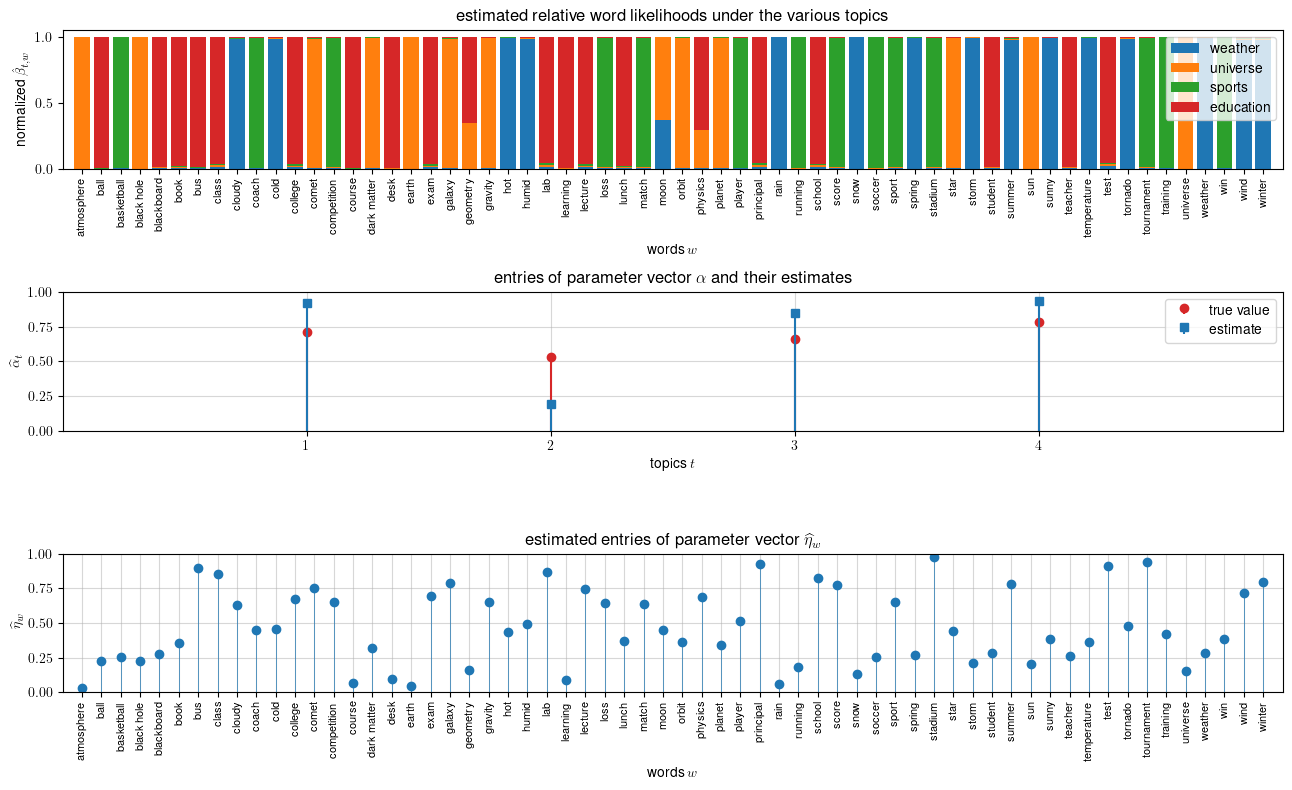

In [65]:
# figure 10

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=13, 8
fig = plt.figure()

ax = fig.add_subplot(311)
x = np.arange(W)
b1 = Beta_estimated_norm[:, 1]
b2 = Beta_estimated_norm[:, 0]
b3 = Beta_estimated_norm[:, 2]
b4 = Beta_estimated_norm[:, 3]

ax.bar(x, b1, label="weather")
ax.bar(x, b2, bottom=b1, label="universe")
ax.bar(x, b3, bottom=b1+b2, label="sports")
ax.bar(x, b4, bottom=b1+b2+b3, label="education")
plt.legend(loc='upper right')
ax.set_xlim(-1, W)
ax.set_xticks(x)
ax.set_title("estimated relative word likelihoods under the various topics")
ax.set_ylabel("normalized $\hat{\\beta}_{t, w}$")
ax.set_xticklabels(dictionary.tolist(), rotation='vertical', fontsize=8)
ax.set_xlabel("words $w$")

ax = fig.add_subplot(312)

markerline, stemlines, baseline = ax.stem(np.arange(T)+1, alpha_original, label="true value")
markerline_, stemlines_, baseline_ = ax.stem(np.arange(T)+1, alpha_org, label="estimate")
plt.setp(stemlines, 'color', 'tab:red')
plt.setp(stemlines, 'linewidth', 1.5)
plt.setp(baseline, 'linewidth', 0)
plt.setp(markerline, 'color', 'tab:red')
plt.setp(stemlines_, 'linewidth', 1.5)
plt.setp(baseline_, 'linewidth', 0)
plt.setp(markerline_, 'marker', 's')
ax.set_ylim([0, 1])
ax.set_title("entries of parameter vector $\\alpha$ and their estimates")
ax.set_ylabel("$\widehat{\\alpha}_t$")
ax.set_xlabel("topics $t$")
plt.legend()
ax.set_xlim([0, 5])
ax.set_xticks(np.arange(1, 5))
plt.grid(zorder=0, alpha=0.5)

ax = fig.add_subplot(313)

markerline, stemlines, baseline = ax.stem(x, eta_original)
plt.setp(stemlines, 'linewidth', 0.5)
plt.setp(baseline, 'linewidth', 0)
ax.set_xlim(-1, W)
ax.set_ylim([0, 1])
ax.set_xticks(x)
ax.set_xticklabels(dictionary.tolist(), rotation='vertical', fontsize=8)
ax.set_title("estimated entries of parameter vector $\widehat{\eta}_w$")
ax.set_ylabel("$\widehat{\eta}_w$")
ax.set_xlabel("words $w$")
plt.grid(zorder=0, alpha=0.5)

fig.tight_layout()

plt.savefig("figs/fig-10.pdf", format="pdf", bbox_inches="tight")

plt.plot()

**Figure 37.10** The top plot shows the normalized estimated values for $\widehat{\beta}_{t,w}$; the height of the colored bars indicates the likelihood that each word appears under a particular topic, as was the case with the earlier Fig. 37.7.  The middle plot in the same figure shows the true and estimated values for the entries of $\alpha$. Likewise, the bottom plot shows the estimated entries of the parameter vector $\eta$.

These quantities will be used during testing as explained below. In addition, the algorithm does the following:

(a) It generates, for each topic $t$, a $W\times 1$ likelihood vector $\widehat{\beta}_{t}$ of size $W\times 1$. The entries $\{\widehat{\beta}_{t,w}\}$ of this vector indicate the likelihoods for each of the words in the dictionary to appear under topic $t$. The four $\widehat{\beta}-$vectors generated by algorithm (37.106) are shown in Fig. 37.9. Observe how the algorithm succeeds in assigning the dictionary words to the right topics; in the figure, we are labeling the topics generically by $t\in \{1,2,3,4\}$ since, in practice, the algorithm would not know the exact context for these topics. In other words, the algorithm would not know that the topics deal with "weather", "universe", "sports", and "education". Observe further, from examining the placement of the likelihoods in the figure that topic 1 corresponds to "weather", topic 2 corresponds to "sports", topic 3 corresponds to "universe", and topic 4 corresponds to "education". For comparison purposes we reproduce the top row of 
Fig. 37.7 by normalizing the estimated values $\widehat{\beta}_{t,w}$; the result is shown in the top row of Fig. 37.7. The middle plot in the same figure shows the true and estimated values for the entries of $\alpha$. Likewise, the bottom plot shows the estimated entries of the parameter vector $\eta$.

(b) It generates, for each document $d$, a $T\times 1$ likelihood vector $\widehat{\theta}_d$. The entries $\{\widehat{\theta}_{d,t}\}$ of this vector indicate the likelihood of the various topics appearing in the document.

(c) It generates an estimate for the $T\times 1$ parameter vector $\alpha$, denoted by $\widehat{\alpha}=\textnormal{col}\{\widehat{\alpha}_t\}$, where the entries $\widehat{\alpha}_t$ correspond to the end-values of the iterates $\alpha_t^{(m)}$ when the algorithm stops. 

(d) It generates an estimate for the $W\times 1$ parameter vector $\eta$, denoted by $\widehat{\eta}=\textnormal{col}\{\widehat{\eta}_w\}$, where the entries $\widehat{\eta}_w$ correspond to the end-values of the iterates $\eta_w^{(m)}$ when the algorithm stops. 

In this way, the training process yields the following parameters for the database:

$
\textnormal{database}\;\Longrightarrow\;
\Bigl\{
\widehat{\beta}_t,\;\widehat{\theta}_d,\;\widehat{\alpha},\;\widehat{\eta}
\Bigr\}_{t=1,d=1}^{T,D}\;
$

$\textbf{Testing}$ We test the operation of the LDA procedure listed in (37.119) on the following sample set of nine test sentences:

1. The weather in Florida can be hot and humid during summer.

2. The Earth and other planets in the solar system orbit around the Sun.

3. Physics tells us that the universe with its billions of stars and galaxies is expanding.

4. Students learn advanced physics and geometry in college.

5. Soccer players train regularly with their coach in preparation for competitions.

6. Temperatures are falling and snow and cold weather are expected in the mountains.

7. The teacher arrived at school and found his young students playing with a ball

8. Players arrived by bus at the stadium for their last match in the competition.

9. The lecture  in class today was about gravity, planetary motion, and the stars.

We extract the keywords manually from these sentences to arrive at the list shown in 
Table 37.3. That is, we extract the words that resemble those present in the dictionary.

<br>
<table style="width: 70%;">
    <tr>
    <th>d</th>
    <th>Sentence in database</th>
  </tr>
  <tr>
    <th>1</th>
    <th>{hot, humid, summer, weather}</th>
  </tr>
  <tr>
    <th>2</th>
    <th>{earth, orbit, planet, sun}</th>
  </tr>
  <tr>
    <th>3</th>
    <th>{galaxy, physics, star, universe}</th>
  </tr>
  <tr>
    <th>4</th>
    <th>{college, geometry, learning, physics, student}</th>
  </tr>
  <tr>
    <th>5</th>
    <th>{coach, competition, player, soccer, training}</th>
  </tr>   
  <tr>
    <th>6</th>
    <th>{cold, snow, temperature, weather}</th>
  </tr>   
  <tr>
    <th>7</th>
    <th>{ball, school, student, teacher}</th>
  </tr> 
  <tr>
    <th>8</th>
    <th>{bus,competition, match, player, stadium}</th>
  </tr>
  <tr>
    <th>9</th>
    <th>{class, gravity, lecture, planet, star}</th>
  </tr>  
</table>
<br>


$
\left\{ \begin{array}{ll}
        \textbf{Recursion for testing new sentences.} \\ \\
        \textbf{input} \textnormal{Database with } D \textnormal{ sentences with } N_d \textnormal{ keywords in each document } d. \\
        \textnormal{A collection of } D_{test} \textnormal{ new sentences, leading to } D_{new} = D + D_{test}\\ \\
        \textbf{parameters} \textnormal{: intergers } T \textnormal{ for total topics and } W \textnormal{ for total keywords, }\\ 
        \textnormal{and positive estimated scalars } \{\widehat{\alpha}_t\}, t=1,\ldots,T  \\ \\
        \textnormal{ set } \theta_{d,t}^{(n),-1}=\theta_{d,t}^{(n)} \textnormal{, for } t=1,\ldots,T, d=1,\ldots,D, n=1,\ldots,N_d; \\ \\
        \textnormal{ set } \alpha_{t}^{(d),-1}=\alpha_{t}^{(d)}, for t=1,\ldots,T, d=1,\ldots,D \\ \\
        \textnormal{ set } \theta_{d,t}^{(n),-1}=1/T, for t=1,\ldots,T, d=D+1,\ldots,D_{new}, n=1,\ldots,N_d; \\ \\
        \textnormal{ set } \alpha_{t}^{(d),-1}=\widehat{\alpha}_t+\displaystyle \sum_{n=1}^{N_d}\theta_{d,t}^{(n),-1}, for t=1,\ldots,T, d=D+1,\ldots,D_{new}. \\ \\
        \textbf{repeat for sufficient iterations over: } m=0,1,2,\ldots: \\ \\
        \left\{ \begin{array}{ll}
                \bar{\beta}_{t,w}^{(m-1)}=\dfrac{\displaystyle\sum_{d'=1}^{D_{new}}\sum_{n'=1}^{N_{d'}}
                \theta_{d',t}^{(n'), m-1}\,\mathbb{I}[w_{d',n'}=w]}{\displaystyle\sum_{w'=1}^W\sum_{d'=1}^{D_{new}} \sum_{n'=1}^{N_{d'}}
                \theta_{d',t}^{(n'),m-1}\,\mathbb{I}[w_{d',n'}=w']},\;\begin{array}{l}t=1,\ldots,T\\w=1,\ldots,W\end{array} \\ \\
                \textbf{repeat for each document: } d=1,2,\ldots D_{new}: \\ \\
                \left\{ \begin{array}{ll}
                        \theta_{d,t}^{(n),m}=\bar{\beta}_{t,w_{d,n}}^{(m-1)}\,\textnormal{exp}\left\{
                        \psi\Bigl(\alpha_{t}^{(d),m-1}\Bigr)-\psi\Bigl(\displaystyle\sum_{j=1}^T\alpha_{j}^{(d),m-1}\Bigr)\right\}\\\;\;\;\;\;\;\;\;\quad\quad\quad\quad  n=1,\ldots, N_d,\;\;t=1,\ldots, T \\ \\
                        \theta_{d,t}^{(n),m}\longleftarrow \theta_{d,t}^{(n),m}\Bigr/
                        \displaystyle \sum_{t'=1}^T \theta_{d,t'}^{(n),m},\;\;\begin{array}{l}t=1,\ldots,T\\n=1,\ldots,N_d\end{array} \\ \\
                        \alpha_{t}^{(d),m} = \widehat{\alpha}_{t} + \displaystyle\sum_{n=1}^{N_d} \theta_{d,t}^{(n),m},\;t=1,\ldots,T \\ \\
                \end{array} \right. \\
                \textbf{end} \\ \\
        \end{array} \right. \\
        \textbf{end} \\ \\
        \widehat{\theta}_{d,t}=\displaystyle \alpha_t^{(d)}\Bigr/ \left(\sum_{t'=1}^T \alpha_{t'}^{(d)}\right),\;t=1,\ldots,T,\;d=1,\ldots,D_{new} \\ \\
\end{array} \right.
$

In [ ]:
# To run this test, we only need the dictionary of keywords, the alpha matrix variable (TxD) containing the
# alpha_{t}^[d}, and the thetaCell 1xD cell structure containing the theta_{d, t}^{n} variables;
# each cell entry is TxNd matrix. We also need the Nd_vec containing the sizes of the various sentences in the database

# TESTING
# Database of test documents: 9 senteces
Dtest = 9
sentence1 = 'The weather in Florida can be hot and humid during Summer'
sentence2 = 'The Earth and other planets in the solar system orbit around the Sun'
sentence3 = 'Physics tells us that the universe with its billions of stars and galaxies is expanding'
sentence4 = 'Students learn advanced physics and geometry in college'
sentence5 = 'Soccer players train regularly with their coach in preparation for competitions'
sentence6 = 'Temperatures are falling and snow and cold weather is possible in the mountains'
sentence7 = 'The teacher arrived at school and found his young students playing with a ball'
sentence8 = 'Players arrived by bus at the stadium for their last match in the competition'
sentence9 = 'The lecture today in class was about gravity, planetary motion, and the stars'

# keywords extracted from each test document
words1 = np.array(['weather', 'hot', 'humid', 'summer'])
words1 = np.sort(words1)
N1 = max(words1.shape) # size of N_d of document 1

words2 = np.array(['earth','planet','orbit','sun'])
words2 = np.sort(words2)
N2 = max(words2.shape) # size of N_d of document 2

words3 = np.array(['physics','universe','star','galaxy'])
words3 = np.sort(words3)
N3 = max(words3.shape) # size of N_d of document 3

words4 = np.array(['student','learning','physics','geometry','college'])
words4 = np.sort(words4)
N4 = max(words4.shape) # size of N_d of document 4

words5 = np.array(['soccer','player','training','coach','competition'])
words5 = np.sort(words5)
N5 = max(words5.shape) # size of N_d of document 5

words6 = np.array(['temperature','snow','cold','weather'])
words6 = np.sort(words6)
N6 = max(words6.shape) # size of N_d of document 6

words7 = np.array(['teacher','school','student','ball'])
words7 = np.sort(words7)
N7 = max(words7.shape) # size of N_d of document 7

words8 = np.array(['player','match','stadium','competition','bus'])
words8 = np.sort(words8)
N8 = max(words8.shape) # size of N_d of document 8

words9 = np.array(['lecture','class','planet','gravity','star'])
words9 = np.sort(words9)
N9 = max(words9.shape) # size of N_d of document 9

Nd_vec_test = np.array([N1, N2, N3, N4, N5, N6, N7, N8, N9])

database_test = [] # database of new documents
database_test.append(words1)
database_test.append(words2)
database_test.append(words3)
database_test.append(words4)
database_test.append(words5)
database_test.append(words6)
database_test.append(words7)
database_test.append(words8)
database_test.append(words9)

# We are goin to add these test documents to the earlier database
# and retrain using as initial conditions the Theta and alpha obtained
# from training the database

Dnew = D + Dtest
Nd_vec_new = np.concatenate([Nd_vec, Nd_vec_test])

epsilon = 0.000001
Theta_test = np.zeros((T, Dtest)) # contains vectors theta_d
Beta_test = np.zeros((W, T)) # contains vectors beta_t

flag = 1 # flag = 1 uses theta{d, t}^{n} and alpha_{t}^{d]}
         # flag = 0 uses widehat{theta}_{d,t} and widehat{alpha}_t

thetaCell_new = []
if flag == 1:
    for d in range(D):
        thetaCell_new.append(thetaCell[d]) # using the final estimated theta from the trained database
else:
    for d in range(D):
        Nd = Nd_vec_new[d]
        X = np.zeros(T, int(Nd))
        Zd = ZN[d] # topics for words in document d
        for nn in range(int(Nd)):
            tt = Zd[nn] # topic for word of index nn
            X[tt, nn] = Theta[tt, d]
        thetaCell_new.append(X) # using the final estimated theta from teh trained database

for d in range(D, Dnew):
    thetaCell_new.append((1/T)*np.ones((T, 1))@np.ones((1, int(Nd_vec_test[d-D])))) # for newer documents 

alpha_new = np.zeros((T, Dnew))
if flag == 1:
    for d in range(D): #alpha's set to value estimated from training
        alpha_new[:, d] = alpha[:, d]
else:
    for d in range(D):
        alpha_new[:, d] = alpha_original

for d in range(D, Dnew): # for the newer documents
    X = (1/T)*np.ones((T, 1))@np.ones((1, int(Nd_vec_test[d-D])))
    alpha_new[:, d] = alpha_original + X.sum(axis=1)

DidxCell_new = [] # one vector of size Nd for each document; saves location of words from document in the dictionary
for d in range(Dnew):
    DidxCell_new.append(np.zeros(int(Nd_vec_new[d])))

database_new = database + database_test
beta_bar_new = (1/T)*np.ones((W, 1))@np.ones((1, T)) # W x T matrix

for ell in range(L): #iterate over epochs
    URR = np.random.permutation(Dnew) # random reshuffling
    for m in range(M):
        print(m, M)
        for t in range(T): # computing beta_bar
            for w in range(W):
                word_w = dictionary[w]
                num = 0 # numerator value
                for d2 in range(Dnew):
                    d = URR[d2]
                    Nd = Nd_vec_new[d] # number of words in document d
                    document = database_new[d] # the documebt itself
                    X = thetaCell_new[d] # matrix of theta's of size T x Nd for each document
                    idx_vec_new = DidxCell_new[d] # vector of indexes for locations of words from document d
                    for n_prime in range(int(Nd)):
                        word_d_n_prime = document[n_prime]
                        if word_d_n_prime == word_w:
                            num = num + X[t, n_prime]
                            idx_vec_new[n_prime] = w # word w_{d, n_prime} is word of inde w in the large dictionary
                    DidxCell_new[d] = idx_vec_new
                if num != 0:
                    beta_bar_new[w, t] = num # updated t-th column of beta matrix
                else:
                    beta_bar_new[w, t] = 0
            beta_bar_new[:, t] = beta_bar_new[:, t] / sum(beta_bar_new[:, t])
        for d2 in range(Dnew): #iterate over documents
            d = URR[d2]
            Nd = Nd_vec_new[d] # number of words in document d
            document = database_new[d] # the document itself
            X = thetaCell_new[d] # matrix of theta's of size T x Nd for each document
            idx_vec_new = DidxCell_new[d] # vector of indexes for locations of words from document d

            for t in range(T): # computing the theta's
                Y = beta_bar_new
                a = digamma(alpha_new[t, d])
                b = digamma(sum(alpha_new[:, d]))
                c = np.exp(a-b)
                idx_vec_new = DidxCell_new[d]
                for n in range(int(Nd)):
                    nidx = idx_vec_new[n]
                    X[t, n] = Y[int(nidx), t]*c # updated t-th row of theta matrix
            
            for n in range(int(Nd)): # renormalize theta columns
                X[:, n] = X[:, n] / sum(X[:, n])
            
            thetaCell_new[d] = X # update theta

            for t in range(T):
                alpha_new[t, d] = alpha_original[t] + sum(X[t, :])

Theta_new = np.zeros((T, Dnew))
for t1 in range(T):
    for d1 in range(Dnew):
        Theta_new[t1, d1] = alpha_new[t1, d1]/alpha_new[:, d1].sum()


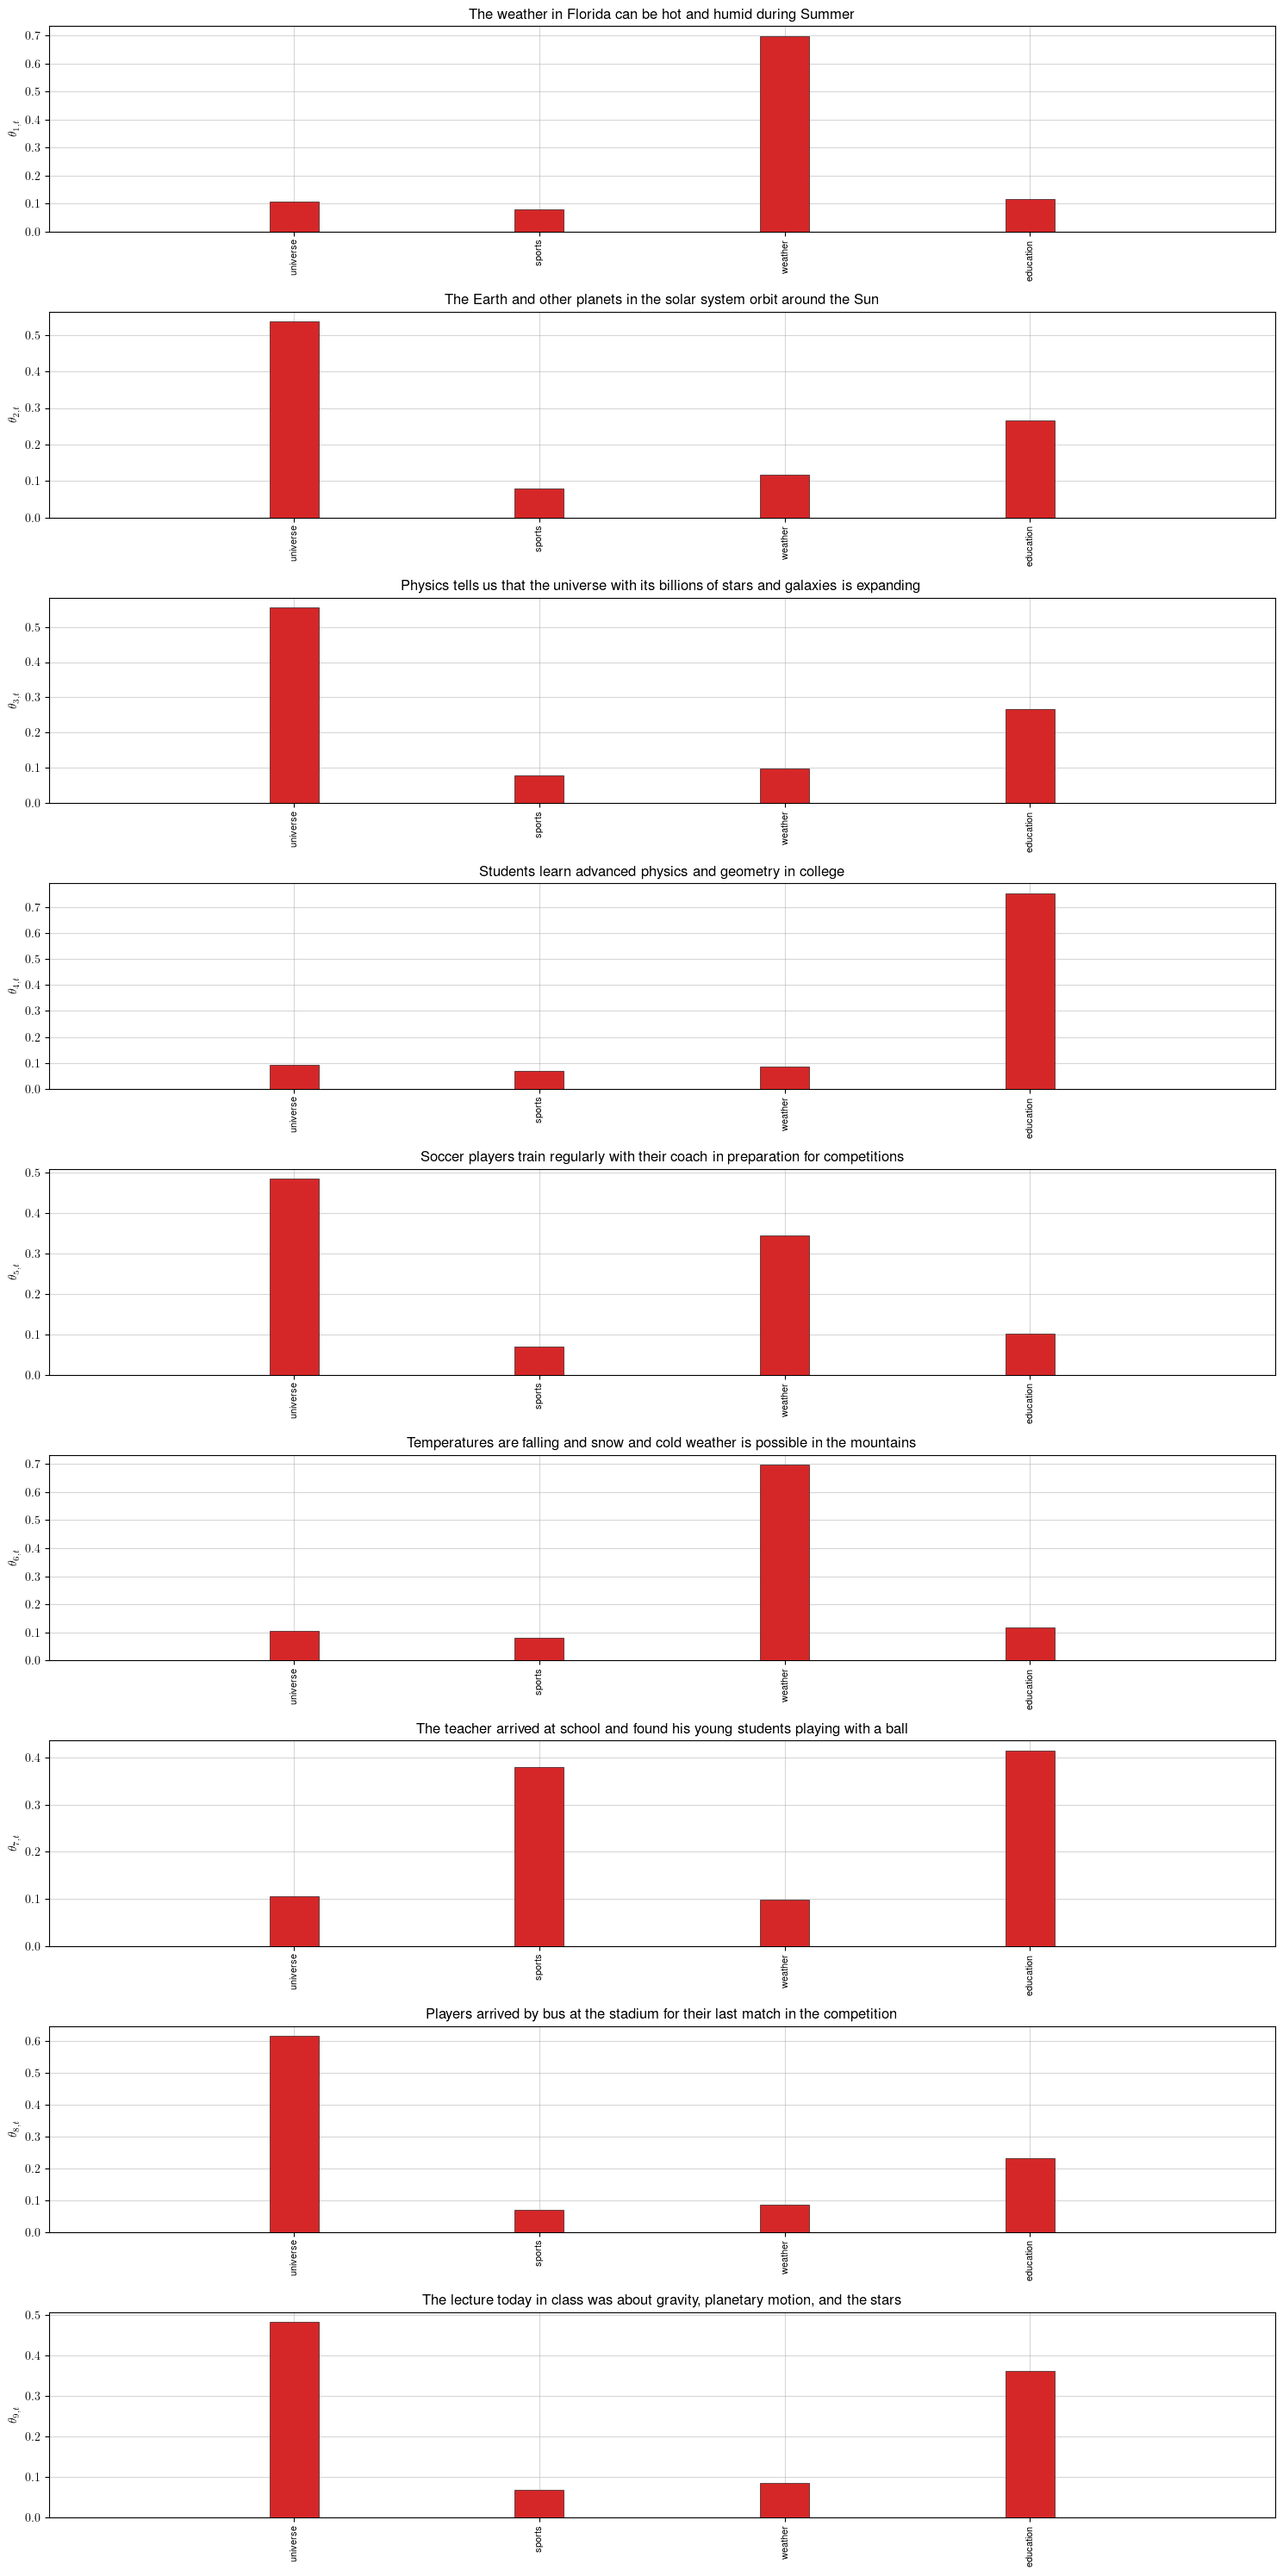

In [98]:
# figure 11

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 30
fig = plt.figure()

ax = fig.add_subplot(911)
x = np.arange(T)
topics = ["universe", "sports", "weather", "education"]

ax.bar(x, Theta_new[:, D],  color="tab:red", edgecolor="black", linewidth=0.4, zorder=3, width=0.2)
ax.set_xlim(-1, T)
ax.set_xticks(x)
ax.set_title(sentence1)
ax.set_ylabel("$\\theta_{1, t}$")
ax.set_xticklabels(topics, rotation='vertical', fontsize=8)
plt.grid(zorder=0, alpha=0.5)

ax = fig.add_subplot(912)

ax.bar(x, Theta_new[:, D+1],  color="tab:red", edgecolor="black", linewidth=0.4, zorder=3, width=0.2)
ax.set_xlim(-1, T)
ax.set_xticks(x)
ax.set_title(sentence2)
ax.set_ylabel("$\\theta_{2, t}$")
ax.set_xticklabels(topics, rotation='vertical', fontsize=8)
plt.grid(zorder=0, alpha=0.5)

ax = fig.add_subplot(913)
ax.bar(x, Theta_new[:, D+2],  color="tab:red", edgecolor="black", linewidth=0.4, zorder=3, width=0.2)
ax.set_xlim(-1, T)
ax.set_xticks(x)
ax.set_title(sentence3)
ax.set_ylabel("$\\theta_{3, t}$")
ax.set_xticklabels(topics, rotation='vertical', fontsize=8)
plt.grid(zorder=0, alpha=0.5)

ax = fig.add_subplot(914)
ax.bar(x, Theta_new[:, D+3],  color="tab:red", edgecolor="black", linewidth=0.4, zorder=3, width=0.2)
ax.set_xlim(-1, T)
ax.set_xticks(x)
ax.set_title(sentence4)
ax.set_ylabel("$\\theta_{4, t}$")
ax.set_xticklabels(topics, rotation='vertical', fontsize=8)
plt.grid(zorder=0, alpha=0.5)

ax = fig.add_subplot(915)
ax.bar(x, Theta_new[:, D+4],  color="tab:red", edgecolor="black", linewidth=0.4, zorder=3, width=0.2)
ax.set_xlim(-1, T)
ax.set_xticks(x)
ax.set_title(sentence5)
ax.set_ylabel("$\\theta_{5, t}$")
ax.set_xticklabels(topics, rotation='vertical', fontsize=8)
plt.grid(zorder=0, alpha=0.5)

ax = fig.add_subplot(916)
ax.bar(x, Theta_new[:, D+5],  color="tab:red", edgecolor="black", linewidth=0.4, zorder=3, width=0.2)
ax.set_xlim(-1, T)
ax.set_xticks(x)
ax.set_title(sentence6)
ax.set_ylabel("$\\theta_{6, t}$")
ax.set_xticklabels(topics, rotation='vertical', fontsize=8)
plt.grid(zorder=0, alpha=0.5)

ax = fig.add_subplot(917)
ax.bar(x, Theta_new[:, D+6],  color="tab:red", edgecolor="black", linewidth=0.4, zorder=3, width=0.2)
ax.set_xlim(-1, T)
ax.set_xticks(x)
ax.set_title(sentence7)
ax.set_ylabel("$\\theta_{7, t}$")
ax.set_xticklabels(topics, rotation='vertical', fontsize=8)
plt.grid(zorder=0, alpha=0.5)

ax = fig.add_subplot(918)
ax.bar(x, Theta_new[:, D+7],  color="tab:red", edgecolor="black", linewidth=0.4, zorder=3, width=0.2)
ax.set_xlim(-1, T)
ax.set_xticks(x)
ax.set_title(sentence8)
ax.set_ylabel("$\\theta_{8, t}$")
ax.set_xticklabels(topics, rotation='vertical', fontsize=8)
plt.grid(zorder=0, alpha=0.5)

ax = fig.add_subplot(919)
ax.bar(x, Theta_new[:, D+8],  color="tab:red", edgecolor="black", linewidth=0.4, zorder=3, width=0.2)
ax.set_xlim(-1, T)
ax.set_xticks(x)
ax.set_title(sentence9)
ax.set_ylabel("$\\theta_{9, t}$")
ax.set_xticklabels(topics, rotation='vertical', fontsize=8)
plt.grid(zorder=0, alpha=0.5)

fig.tight_layout()

plt.show()

**Figure 37.11** Topic assignments for the nine test sentences in terms of likelihood values. 

The objective is to identify automatically the topics that these sentences are dealing with. To do so, we proceed as follows. We enlarge the original database of $D=1000$ sentences and add the nine test sentences represented by their keywords. In this way, we end up with a database of new size $D_{\rm new}=1009$. We already know from the unsupervised training procedure what the $\Theta^{(d)}=\{\theta_{d,t}^{(n)}\}$ values are for each of the original $D=1000$ sentences; these are the $\theta-$values obtained at the end of the training process. We also know what the $\alpha^{(d)}=\{\alpha_{t}^{(d)}\}$ values are for these same sentences. We  use these quantities as initial conditions  for the first $D=1000$ sentences in the expanded database. On the other hand, we initialize these parameters for the new (test) sentences in the same manner as we did before in (37.51). We subsequently run the recursions shown in (37.119) to update and learn the parameters $\{\theta_{d,t}^{(n)},\alpha_t^{(d)}\}$ for all sentences in the expanded database, including the original sentences and the new test sentences. In the implementation, we use the estimates $\widehat{\alpha}=\{\widehat{\alpha}_t\}$ that were also learned during the training process. 

 We can alternatively initialize the iterates  $\alpha_{t}^{(d),-1}$ and $\theta_{d,t}^{(n),-1}$  by using instead the parameter values $\widehat{\alpha}_{t}$ and $\widehat{\theta}_{d,z_{d,n}}$ for word $w_{d,n}$; recall that $z_{d,n}$ indicates the topic for $w_{d,n}$.  We run the recursions for $M=300$ iterations again using the same step-size parameter. At the end of the procedure, we end up with the vectors 
$\widehat{\theta}_d=\textnormal{col}\{\widehat{\theta}_{d,t}\}$ for all sentences in the database, and in particular for the test sentences corresponding to $d=D+1,\ldots, D_{new}$. Figure 37.11 plots these likelihood vectors; their entries indicate which topics are most likely for each of the test sentences. Observe how the results are consistent with what is expected. For example, the first test sentence has highest likelihood of belonging to topic 1, which corresponds to "weather". Observe how for the last test sentence, there are two topic assignments that are most likely, namely, topics 3 and 4, which deal with "universe" and "education".